# LSTM 

### Importing the module that scrapes the internet for the latest values count

In [314]:
import csv_updater

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

#### Getting the starter data from John Hopkin's CSV File

In [316]:
df = pd.read_csv("johnhopkins-3March.csv")

In [317]:
df = df.T

In [318]:
cols_drop = []
for i in range(114):
    if i != 0 and i != 5:
        cols_drop.append(i)
df.drop(df.columns[cols_drop], axis = 1, inplace = True) 

In [319]:
df

,0,5
Province/States,Confirmed,Deaths
Country/Region,Globally,Mainland China
WHO region,NaN,Western Pacific Region
1/21/2020,282,NaN
1/22/2020,314,NaN
1/23/2020,581,NaN
1/24/2020,846,NaN
1/25/2020,1320,NaN
1/26/2020,2014,NaN
1/27/2020,2798,80


In [320]:
df.drop(['Country/Region', 'WHO region', 'Province/States'], inplace = True)

#### Cleaning the Data

In [321]:
df.head()

,0,5
1/21/2020,282,NaN
1/22/2020,314,NaN
1/23/2020,581,NaN
1/24/2020,846,NaN
1/25/2020,1320,NaN


In [322]:
df.shape

(43, 2)

In [323]:
df.rename(columns = {0:'Infected', 5:'Deaths'}, inplace = True)

In [324]:
df.head()

,Infected,Deaths
1/21/2020,282,NaN
1/22/2020,314,NaN
1/23/2020,581,NaN
1/24/2020,846,NaN
1/25/2020,1320,NaN


In [325]:
df.shape

(43, 2)

#### Using the dates as indices

In [326]:
dates_unix = []
start = 1579478400
for i in range(43):
    start += 86400
    dates_unix.append(start)

print(dates_unix)

[1579564800, 1579651200, 1579737600, 1579824000, 1579910400, 1579996800, 1580083200, 1580169600, 1580256000, 1580342400, 1580428800, 1580515200, 1580601600, 1580688000, 1580774400, 1580860800, 1580947200, 1581033600, 1581120000, 1581206400, 1581292800, 1581379200, 1581465600, 1581552000, 1581638400, 1581724800, 1581811200, 1581897600, 1581984000, 1582070400, 1582156800, 1582243200, 1582329600, 1582416000, 1582502400, 1582588800, 1582675200, 1582761600, 1582848000, 1582934400, 1583020800, 1583107200, 1583193600]


In [327]:
df['Date'] = dates_unix

In [328]:
df.head()

,Infected,Deaths,Date
1/21/2020,282,NaN,1579564800
1/22/2020,314,NaN,1579651200
1/23/2020,581,NaN,1579737600
1/24/2020,846,NaN,1579824000
1/25/2020,1320,NaN,1579910400


In [329]:
df['Date'] = pd.to_datetime(df['Date'], unit='s')

In [330]:
df.head()

,Infected,Deaths,Date
1/21/2020,282,NaN,2020-01-21
1/22/2020,314,NaN,2020-01-22
1/23/2020,581,NaN,2020-01-23
1/24/2020,846,NaN,2020-01-24
1/25/2020,1320,NaN,2020-01-25


In [331]:
df.set_index = df['Date']

In [332]:
start

1583193600

In [333]:
df.head()

,Infected,Deaths,Date
1/21/2020,282,NaN,2020-01-21
1/22/2020,314,NaN,2020-01-22
1/23/2020,581,NaN,2020-01-23
1/24/2020,846,NaN,2020-01-24
1/25/2020,1320,NaN,2020-01-25


In [334]:
df = df.reset_index(drop=True)

In [335]:
df.set_index("Date", inplace = True) 

In [336]:
df.head()

,Infected,Deaths
Date,,
2020-01-21,282,NaN
2020-01-22,314,NaN
2020-01-23,581,NaN
2020-01-24,846,NaN
2020-01-25,1320,NaN


In [337]:
df.fillna(0, inplace=True)

In [338]:
df.head()

,Infected,Deaths
Date,,
2020-01-21,282.0,0.0
2020-01-22,314.0,0.0
2020-01-23,581.0,0.0
2020-01-24,846.0,0.0
2020-01-25,1320.0,0.0


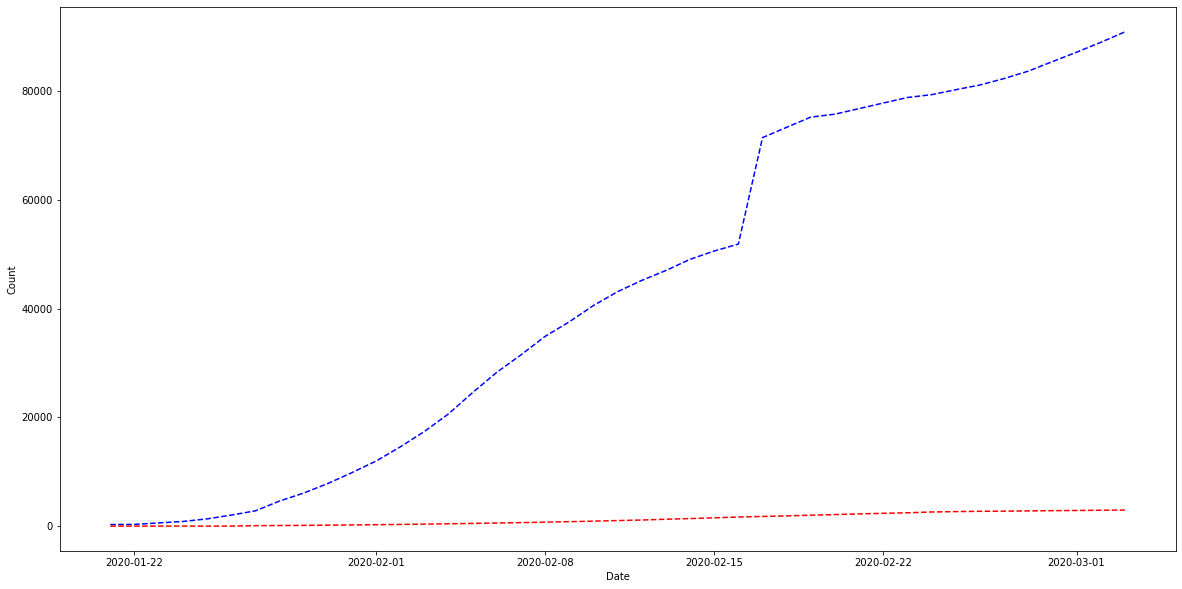

In [339]:
plt.figure(figsize=(20, 10))
plt.plot(df.Infected, 'b--')
plt.plot(df.Deaths, 'r--')
plt.ylabel("Count")
plt.xlabel("Date")
plt.show()

In [340]:
infected, deaths = csv_updater.get_nums()

In [341]:
import datetime
now = datetime.datetime.now()

In [342]:
currdate = now.strftime("%Y-%m-%d")

In [343]:
infected, deaths

(98773, 3390)

In [344]:
currdate = '2020-03-06'
currdate = pd.to_datetime(currdate)

In [350]:
df.loc[currdate]= [infected, deaths]

In [351]:
df.tail(1)

,Infected,Deaths
Date,,
2020-03-06,98773.0,3390.0


In [359]:
if df.loc[currdate].any():
    print("Data already exists")    
else:
    df.loc[currdate] = [infected, deaths]

Data already exists


In [360]:
df.tail()

,Infected,Deaths
Date,,
2020-02-29,85403.0,2838.0
2020-03-01,87137.0,2873.0
2020-03-02,88948.0,2915.0
2020-03-03,90870.0,2946.0
2020-03-06,98773.0,3390.0


In [361]:
df.loc['2020-03-04'] = [95310,3285]

In [362]:
df.loc['2020-03-05'] = [98414,3387]

In [365]:
df.drop(['2020-03-04','2020-03-05'], inplace=True)

In [367]:
df.head(30)

,Infected,Deaths
Date,,
2020-01-21 00:00:00,282.0,0.0
2020-01-22 00:00:00,314.0,0.0
2020-01-23 00:00:00,581.0,0.0
2020-01-24 00:00:00,846.0,0.0
2020-01-25 00:00:00,1320.0,0.0
2020-01-26 00:00:00,2014.0,0.0
2020-01-27 00:00:00,2798.0,80.0
2020-01-28 00:00:00,4593.0,106.0
2020-01-29 00:00:00,6065.0,132.0


In [368]:
df.to_csv("StructuredDataset.csv")

In [369]:
df = pd.read_csv("StructuredDataset.csv")

In [370]:
df

,Date,Infected,Deaths
0,2020-01-21 00:00:00,282.0,0.0
1,2020-01-22 00:00:00,314.0,0.0
2,2020-01-23 00:00:00,581.0,0.0
3,2020-01-24 00:00:00,846.0,0.0
4,2020-01-25 00:00:00,1320.0,0.0
5,2020-01-26 00:00:00,2014.0,0.0
6,2020-01-27 00:00:00,2798.0,80.0
7,2020-01-28 00:00:00,4593.0,106.0
8,2020-01-29 00:00:00,6065.0,132.0
9,2020-01-30 00:00:00,7818.0,170.0


No handles with labels found to put in legend.


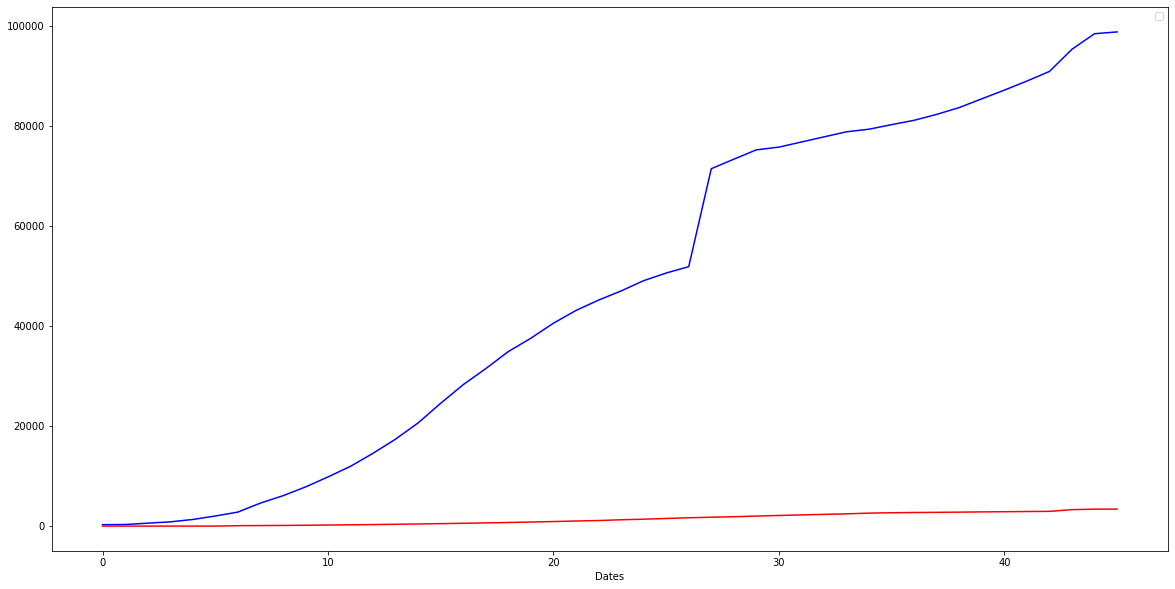

In [372]:
plt.figure(figsize=(20,10))
plt.plot(df.Infected, 'b-')
plt.plot(df.Deaths, 'r-')
plt.xlabel('Dates')
plt.legend('Infected', )
plt.show()